# Batching Over Activity Post-analysis

##### Imports

In [1]:
from neo4j import GraphDatabase
import matplotlib.pyplot as plt
import datetime as dt
from datetime import datetime
import pandas as pd
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from dotenv import load_dotenv
import os


In [2]:
load_dotenv()
uri = os.getenv('NEO4J_URI')
username = os.getenv('NEO4J_USER')
password = os.getenv('NEO4J_PASSWORD')

In [3]:
driver = GraphDatabase.driver(uri, auth=(username, password))

##### Number of Batches

In [4]:
cypher_total_batch_number = """
    MATCH (n:BatchInstance)
    RETURN count (distinct n)
"""


def total_batches(uri, username, password, cypher_total_batch_number):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_total_batch_number)
        data = result.data()
        return data
    
results_total_batches = total_batches(uri, username, password, cypher_total_batch_number)
print(results_total_batches) 

[{'count (distinct n)': 16947}]


Events pepspective exploration

In [5]:
cypher_avg_events_in_batch = """
    MATCH (n:BatchInstance)
    RETURN AVG(n.events_number) AS average_events_per_batch,
        MIN(n.events_number) AS min_events_per_batch,
        MAX(n.events_number) AS max_events_per_batch
"""


def avg_events_in_batch(uri, username, password, cypher_avg_events_in_batch):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_avg_events_in_batch)
        data = result.data()
        return data
    
results_avg_events_in_batch = avg_events_in_batch(uri, username, password, cypher_avg_events_in_batch)
print(results_avg_events_in_batch) 

[{'average_events_per_batch': 12.922169115477594, 'min_events_per_batch': 1, 'max_events_per_batch': 316}]


In [6]:
cypher_events_in_batch_distribution = """
    MATCH (n:BatchInstance)
    WITH n.events_number AS number_events
    RETURN number_events, count(number_events) AS frequency 
"""
def events_in_batch_distribution(uri, username, password, cypher_events_in_batch_distribution):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_events_in_batch_distribution)
        data = result.data()
        return data
    
results_events_in_batch_distribution = events_in_batch_distribution(uri, username, password, cypher_events_in_batch_distribution)

number_events = [record['number_events'] for record in results_events_in_batch_distribution]
frequency = [record['frequency'] for record in results_events_in_batch_distribution]

fig = px.scatter(x=number_events, y=frequency, title='Distribution of Events in BatcheInstances', labels={'x':'Number of Events', 'y':'Frequency'})
fig.update_layout(width=700, height=500)


fig.show()
#pio.write_image(fig, 'Distribution_of_Events_in_BatcheInstances.png', width=800, height=400, scale=3)

##### Average, MIN and MAX Amount of Kits in a Batch

In [7]:
cypher_avg_kits_in_batch = """
    MATCH (n:BatchInstance)
    RETURN AVG(size(n.kits)) AS average_kits_per_batch,
        MIN(size(n.kits)) AS min_kits_per_batch,
        MAX(size(n.kits)) AS max_kits_per_batch
"""


def avg_kits_in_batch(uri, username, password, cypher_avg_kits_in_batch):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_avg_kits_in_batch)
        data = result.data()
        return data
    
results_avg_kits_in_batch = avg_kits_in_batch(uri, username, password, cypher_avg_kits_in_batch)
print(results_avg_kits_in_batch) 

[{'average_kits_per_batch': 8.995102378002015, 'min_kits_per_batch': 1, 'max_kits_per_batch': 153}]


In [8]:
cypher_kits_in_batch_distribution = """
    MATCH (n:BatchInstance)
    WITH size(n.kits) AS number_kits
    RETURN number_kits, count(number_kits) AS frequency 
"""
def kits_in_batch_distribution(uri, username, password, cypher_kits_in_batch_distribution):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_kits_in_batch_distribution)
        data = result.data()
        return data
    
results_kits_in_batch_distribution = kits_in_batch_distribution(uri, username, password, cypher_kits_in_batch_distribution)

number_kits = [record['number_kits'] for record in results_kits_in_batch_distribution]
frequency = [record['frequency'] for record in results_kits_in_batch_distribution]

fig = px.scatter(x=number_kits, y=frequency, title='Distribution of Kits in BatcheInstances', labels={'x':'Number of Kits', 'y':'Frequency'})
fig.update_layout(width=700, height=500)


fig.show()

#pio.write_image(fig, 'Distribution_of_Kits_in_BatcheInstances.png', width=800, height=400, scale=3)

##### Batch Frequency per Activity

In [9]:
cypher_batches_per_activity = """
    MATCH (n:BatchInstance)
    RETURN n.activity as activity, count(n) AS batch_count
    ORDER BY batch_count DESC
"""


def batches_per_activity(uri, username, password, cypher_batches_per_activity):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_batches_per_activity)
        data = result.data()
        return data
    
results_batches_per_activity = batches_per_activity(uri, username, password, cypher_batches_per_activity)

activity = [str(row['activity']) for row in results_batches_per_activity]
batch_counts = [row['batch_count'] for row in results_batches_per_activity]

fig = px.bar(x=activity, y=batch_counts, title='BatchInstances per Activity', labels={'x':'Activity', 'y':'BatchInstance Count'}, color=activity, color_discrete_sequence=['orangered', 'green', 'blue', 'purple', 'orange'])

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_tickfont_size=12,
    yaxis_title='BatchInstance Count',
    xaxis_title='Activity',
    uniformtext_minsize=7,
    uniformtext_mode='hide',
    width=900, 
    height=600,
    showlegend=False 
)

fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

#pio.write_image(fig, 'BatchInstances_per_Activity.png', width=800, height=600, scale=3)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



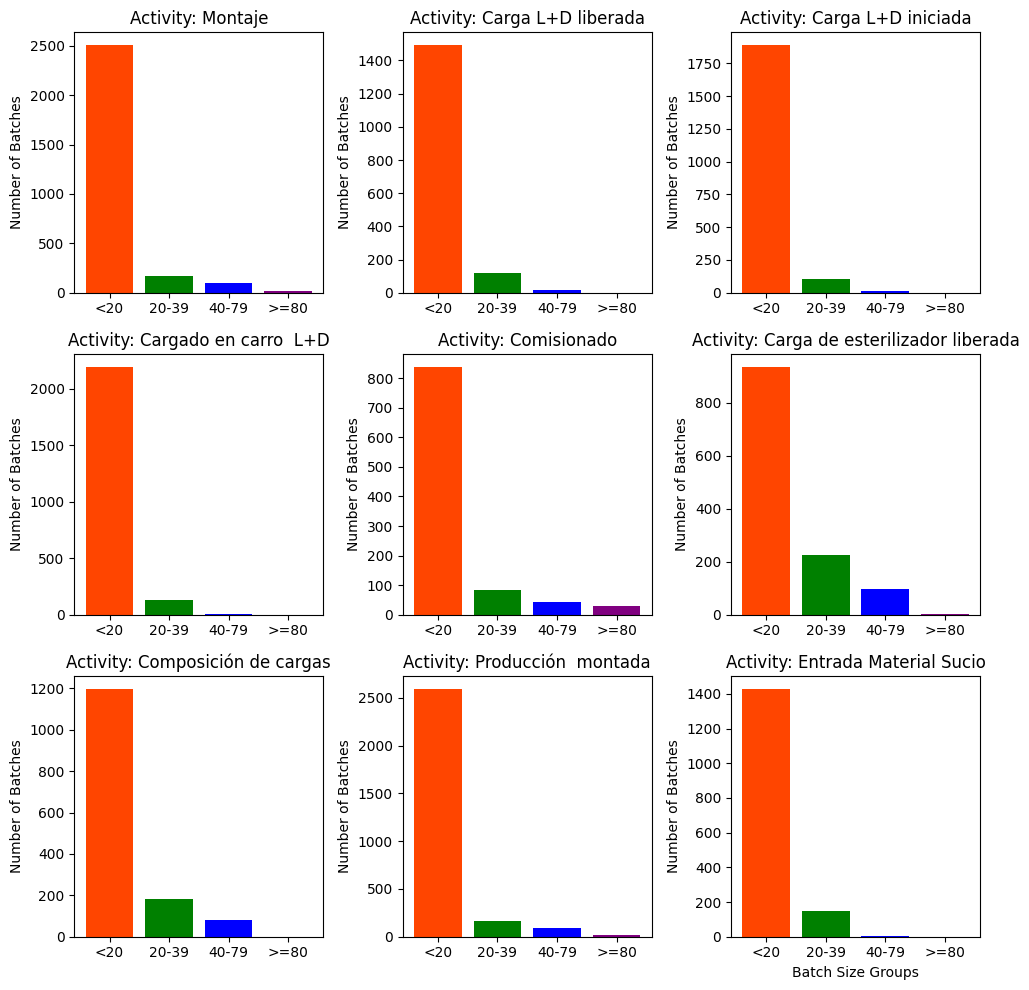

In [10]:
cypher_batches_per_activity = """
    MATCH (n:BatchInstance)
    WITH n.activity AS activity, size(n.kits) AS batch_size
    RETURN activity, 
           sum(CASE WHEN batch_size < 20 THEN 1 ELSE 0 END) AS kits_lt_20,
           sum(CASE WHEN batch_size >= 20 AND batch_size < 40 THEN 1 ELSE 0 END) AS kits_20_39,
           sum(CASE WHEN batch_size >= 40 AND batch_size < 80 THEN 1 ELSE 0 END) AS kits_40_79,
           sum(CASE WHEN batch_size >= 80 THEN 1 ELSE 0 END) AS kits_gt_80
"""

def batches_per_activity(uri, username, password, cypher_query):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_query)
        data = result.data()
        return data
    

results_batches_per_activity = batches_per_activity(uri, username, password, cypher_batches_per_activity)


activities = [row['activity'] for row in results_batches_per_activity]
kits_lt_20 = [row['kits_lt_20'] for row in results_batches_per_activity]
kits_20_39 = [row['kits_20_39'] for row in results_batches_per_activity]
kits_40_79 = [row['kits_40_79'] for row in results_batches_per_activity]
kits_gt_80 = [row['kits_gt_80'] for row in results_batches_per_activity]


colors = ['orangered', 'green', 'blue', 'purple']


fig, axs = plt.subplots(3, 3, figsize=(10, 10))


for i, activity in enumerate(activities):
    row = i // 3
    col = i % 3
    axs[row, col].bar(['<20', '20-39', '40-79', '>=80'],
                      [kits_lt_20[i], kits_20_39[i], kits_40_79[i], kits_gt_80[i]],
                      color=colors)
    axs[row, col].set_title(f'Activity: {activity}')
    axs[row, col].set_ylabel('Number of Batches')

plt.xlabel('Batch Size Groups')
plt.tight_layout()
plt.show()


##### Average, MAX and MIN Batch Processing Time 

In [11]:
cypher_query_average_processing_time_per_batch = """
    MATCH (n:BatchInstance)
    RETURN AVG(datetime(n.latest_timestamp).epochMillis - datetime(n.earliest_timestamp).epochMillis)/60000 AS avg_processing_time_ms,
        MIN(datetime(n.latest_timestamp).epochMillis - datetime(n.earliest_timestamp).epochMillis)/60000 AS min_processing_time_ms,
        MAX(datetime(n.latest_timestamp).epochMillis - datetime(n.earliest_timestamp).epochMillis)/60000 AS max_processing_time_ms
"""


def average_processing_time_per_batch(uri, username, password, cypher_query_average_processing_time_per_batch):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_query_average_processing_time_per_batch)
        data = result.data()
        return data
    
results_average_processing_time_per_batch = average_processing_time_per_batch(uri, username, password, cypher_query_average_processing_time_per_batch)
print(results_average_processing_time_per_batch) 


[{'avg_processing_time_ms': 3.084380716350975, 'min_processing_time_ms': 0, 'max_processing_time_ms': 181}]


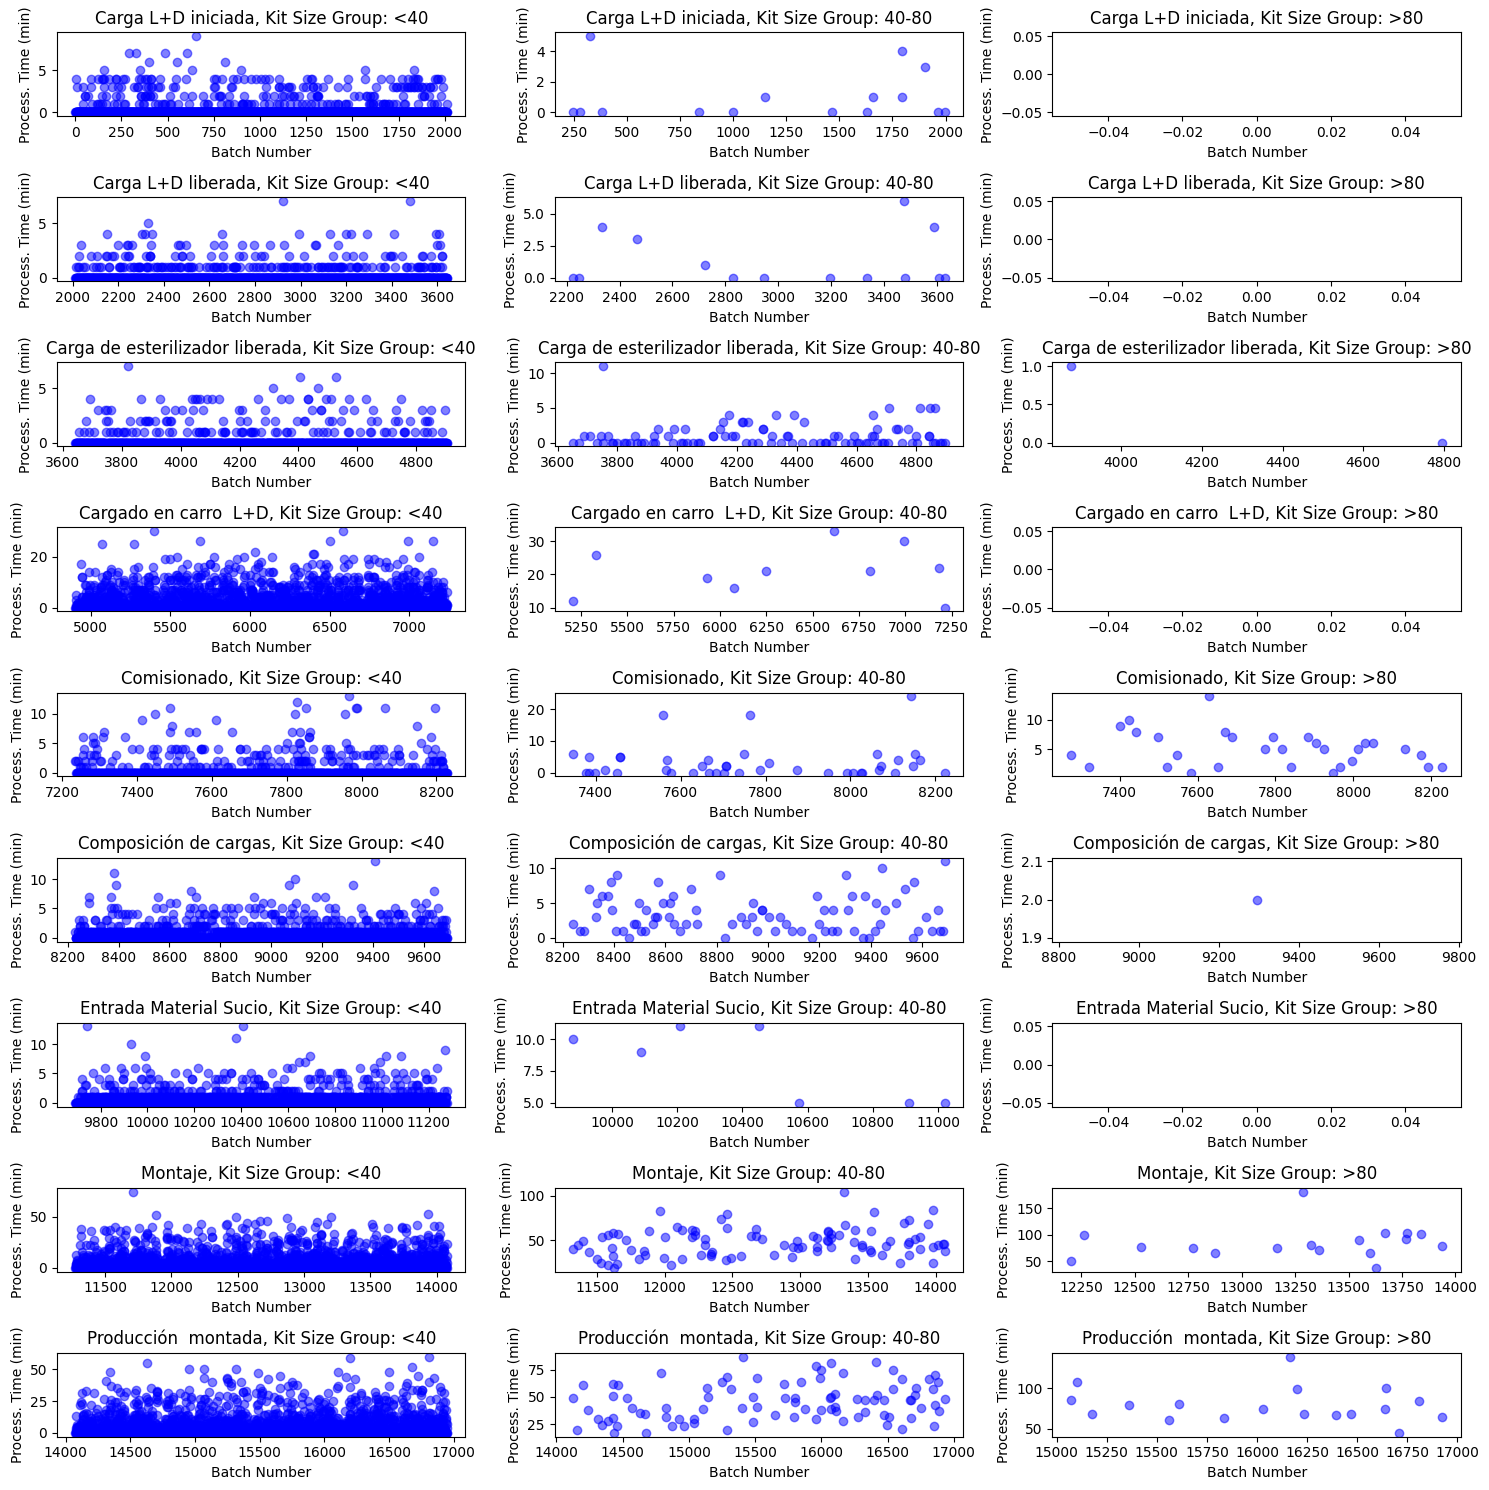

In [12]:
cypher_query_average_processing_time_per_batch = """
    MATCH (n:BatchInstance)
    WITH n, (datetime(n.latest_timestamp).epochMillis - datetime(n.earliest_timestamp).epochMillis)/60000 AS processing_time_min,
         size(n.kits) AS kit_size
    RETURN n.activity AS activity,
           n.batch_number AS batch_number, 
           processing_time_min,
           CASE WHEN kit_size < 40 THEN '<40'
                WHEN kit_size >= 40 AND kit_size <= 80 THEN '40-80'
                ELSE '>80' END AS kit_size_group
"""


def average_processing_time_per_batch(uri, username, password, cypher_query):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_query)
        data = result.data()
        return data

results_average_processing_time_per_batch = average_processing_time_per_batch(uri, username, password, cypher_query_average_processing_time_per_batch)


activities = set(row['activity'] for row in results_average_processing_time_per_batch)
kit_size_groups = ['<40', '40-80', '>80']


fig, axs = plt.subplots(len(activities), len(kit_size_groups), figsize=(15, 15))


for i, activity in enumerate(sorted(activities)):
    for j, kit_size_group in enumerate(kit_size_groups):
   
        filtered_data = [(row['batch_number'], row['processing_time_min']) for row in results_average_processing_time_per_batch 
                         if row['activity'] == activity and row['kit_size_group'] == kit_size_group]

        x_values = [entry[0] for entry in filtered_data]
        y_values = [entry[1] for entry in filtered_data]
     
        axs[i, j].scatter(x_values, y_values, color='blue', alpha=0.5)
        axs[i, j].set_title(f'{activity}, Kit Size Group: {kit_size_group}')
        axs[i, j].set_xlabel('Batch Number')
        axs[i, j].set_ylabel('Process. Time (min)')

plt.tight_layout()
plt.show()



##### Throughput of Batches per Day


In [13]:
cypher_throughput_analysis = """
    MATCH (n:BatchInstance)
    WITH n, date(n.earliest_timestamp) AS day
    RETURN day,
           count(n) AS batch_count
    ORDER BY day
"""


def throughput_analysis(uri, username, password, cypher_throughput_analysis):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_throughput_analysis)
        data = result.data()
        return data
    
results_throughput_analysis = throughput_analysis(uri, username, password, cypher_throughput_analysis)

import matplotlib.pyplot as plt
from datetime import datetime

days = [str(row['day']) for row in results_throughput_analysis]
batch_counts = [row['batch_count'] for row in results_throughput_analysis]

dates = [datetime.strptime(day, '%Y-%m-%d') for day in days]

colors = ['gray' if date.weekday() < 5 else 'orangered' for date in dates]

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=days,
    y=batch_counts,
    mode='lines',
    line=dict(color='gray'),
    showlegend=False
))

for i, day in enumerate(days):
    text_position = 'bottom center' if i % 2 == 0 else 'top center'
    fig.add_trace(go.Scatter(
        x=[day],
        y=[batch_counts[i]],
        mode='markers+text',
        marker=dict(color=colors[i]),
        text=[batch_counts[i]],
        textposition=text_position,
        textfont=dict(size=11, color='black', family='Arial Black'),
        showlegend=False
    ))

fig.update_layout(
    title='Throughput Analysis',
    xaxis_title='Date',
    yaxis_title='BatchInstances Count',
    xaxis_tickangle=-90,
    xaxis_tickfont_size=15,
    width=1600,
    height=1200
)
fig.update_layout(hovermode='x unified')

fig.show()

#pio.write_image(fig, 'BatchInstancesThroughputAnalysis.png', width=1000, height=600, scale=3)

#### Resource Related Analytics

##### Batches per Resource

In [14]:
cypher_batches_per_resource = """
    MATCH (u:Resource)-[:CORR]->(n:BatchInstance)
    RETURN u.sysId AS resource, count(n) AS batch_count
    ORDER BY batch_count DESC
"""

def batches_per_resource(uri, username, password, cypher_batches_per_resource):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_batches_per_resource)
        data = result.data()
        return data
    
results_batches_per_resource = batches_per_resource(uri, username, password, cypher_batches_per_resource)

resource = [str(row['resource']) for row in results_batches_per_resource]
batch_counts = [row['batch_count'] for row in results_batches_per_resource]


fig = px.bar(x=resource, y=batch_counts, title='BatchInstances per Resource', labels={'x':'Resource', 'y':'BatchInstance Count'}, color=resource, color_discrete_sequence=['orangered', 'green', 'blue', 'purple', 'orange'])

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_tickfont_size=12,
    yaxis_title='BatchInstance Count',
    xaxis_title='Resource',
    uniformtext_minsize=7,
    uniformtext_mode='hide',
    width=900, 
    height=600,
    showlegend=False  
)

fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

#pio.write_image(fig, 'BatchInstances_per_Resource.png', width=800, height=400, scale=3)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



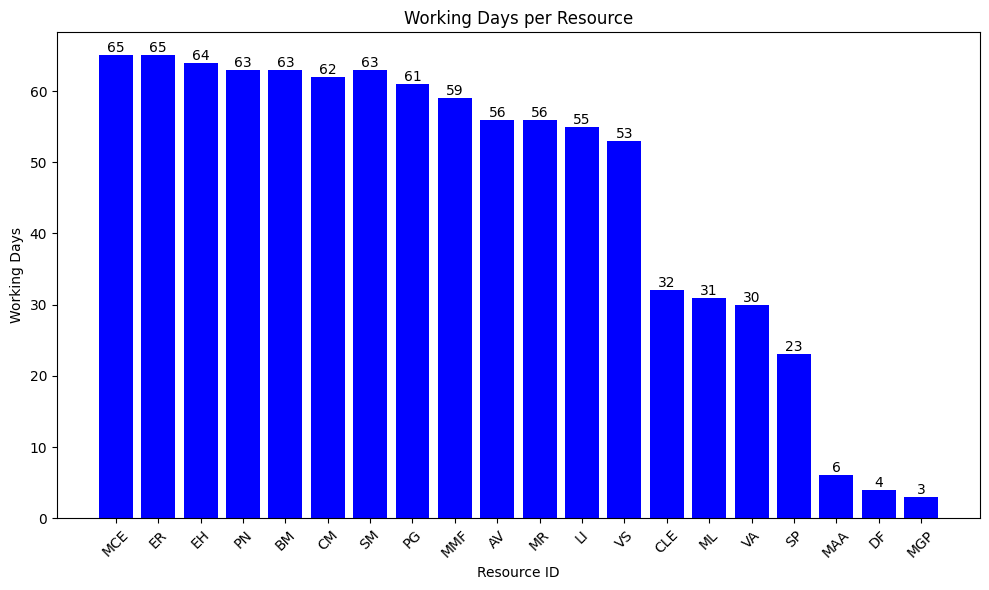

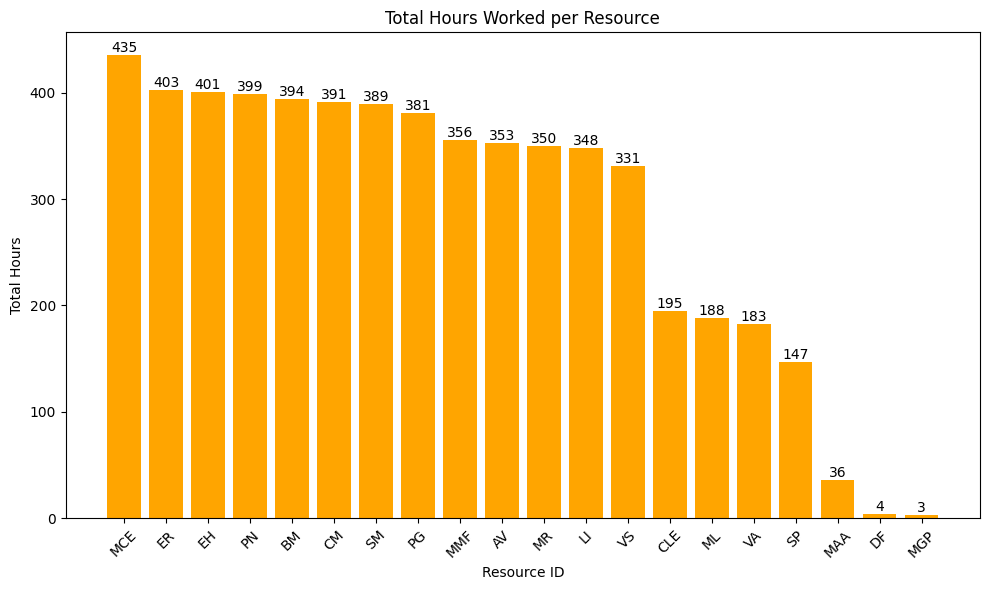

In [15]:
cypher_query = """
MATCH (u:Resource)<-[r:CORR]-(e:Event)
WITH u.sysId AS resource_id,
     date(e.timestamp) AS event_date,
     min(e.timestamp) AS start_time,
     max(e.timestamp) AS end_time
WITH resource_id, event_date, start_time, end_time,
     datetime(end_time).epochMillis - datetime(start_time).epochMillis AS duration_milliseconds
WITH resource_id, event_date, duration_milliseconds,
     CASE WHEN duration_milliseconds < 3600000 THEN 1 ELSE duration_milliseconds / 3600000 END AS duration_hours
RETURN resource_id,
       count(DISTINCT event_date) AS working_days,
       sum(duration_hours) AS total_hours
ORDER BY total_hours DESC
"""

def execute_cypher_query(uri, username, password, cypher_query):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_query)
        data = result.data()
        return data

results = execute_cypher_query(uri, username, password, cypher_query)

resource_ids = [record['resource_id'] for record in results]
working_days = [record['working_days'] for record in results]
total_hours = [record['total_hours'] for record in results]

plt.figure(figsize=(10, 6))
plt.bar(resource_ids, working_days, color='blue')
plt.xlabel('Resource ID')
plt.ylabel('Working Days')
plt.title('Working Days per Resource')
plt.xticks(rotation=45)
plt.tight_layout()

for i in range(len(resource_ids)):
    plt.text(resource_ids[i], working_days[i], str(working_days[i]), ha='center', va='bottom')

plt.show()

plt.figure(figsize=(10, 6))
plt.bar(resource_ids, total_hours, color='orange')
plt.xlabel('Resource ID')
plt.ylabel('Total Hours')
plt.title('Total Hours Worked per Resource')
plt.xticks(rotation=45)
plt.tight_layout()

for i in range(len(resource_ids)):
    plt.text(resource_ids[i], total_hours[i], str(total_hours[i]), ha='center', va='bottom')

plt.show()

In [16]:
cypher_resources_in_batch_distribution = """
    MATCH (n:BatchInstance)
    WITH n.users_number AS number_resource
    RETURN number_resource, count(number_resource) AS frequency 
"""
def resources_in_batch_distribution(uri, username, password, cypher_resources_in_batch_distribution):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_resources_in_batch_distribution)
        data = result.data()
        return data
    
results_resources_in_batch_distribution = resources_in_batch_distribution(uri, username, password, cypher_resources_in_batch_distribution)

fig = px.bar(results_resources_in_batch_distribution, x='number_resource', y='frequency', 
             labels={'number_resource': 'Number of Resources', 'frequency': 'Frequency (Number of BatchInstances)'},
             title='Number of Resources Associated with BatchInstances', text_auto=True)
fig.update_traces(textposition='outside')

fig.update_layout(
    xaxis={
        'tickmode': 'linear',
        'tick0': 1, 
        'dtick': 1, 
        'tickfont': {'size': 10} 
    },
    width=900, 
    height=600,
)

fig.show()
#pio.write_image(fig, 'BatchInstances_per_Resource.png', width=800, height=700, scale=3)


In [17]:
cypher_batches_per_resource = """
    MATCH (u:Resource)-[:CORR]->(n:BatchInstance)
    RETURN u.sysId AS resource, n.activity as activity, count(n) AS batch_count
    ORDER BY batch_count DESC
"""


def batches_per_resource(uri, username, password, cypher_batches_per_resource):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_batches_per_resource)
        data = result.data()
        return data
    
results_batches_per_resource = batches_per_resource(uri, username, password, cypher_batches_per_resource)

resource = [str(row['resource']) for row in results_batches_per_resource]
batch_counts = [row['batch_count'] for row in results_batches_per_resource]
activity = [str(row['activity']) for row in results_batches_per_resource]

fig = px.bar(x=resource, y=batch_counts, title='BatchInstances per Resource and Activity', labels={'x':'Resource', 'y':'BatchInstance Count'}, color=activity, color_discrete_sequence=['olive', 'green', 'blue', 'purple', 'orange', 'grey', 'black', 'lime', 'chocolate' ])

fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_tickfont_size=12,
    yaxis_title='BatchInstance Count',
    xaxis_title='Resource',
    uniformtext_minsize=7,
    uniformtext_mode='hide',
    width=1300, 
    height=800,
    showlegend=True 
)

fig.update_traces(texttemplate='%{y}', textposition='outside')

fig.show()

#pio.write_image(fig, 'batches_per_activity_and_res.png', width=800, height=400, scale=3)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [18]:
cypher_batches_users= """
MATCH (n:BatchInstance)

RETURN 
  distinct n.users, count(n) as frequency 
order by frequency desc
 """

def batches_users(uri, username, password, cypher_batches_users):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_batches_users)
        data = result.data()
        return data
    
results_cypher_batches_users = batches_users(uri, username, password, cypher_batches_users)
df_cypher_batches_users = pd.DataFrame(results_cypher_batches_users)
df_cypher_batches_users['n.users'] = df_cypher_batches_users['n.users'].astype(str)
filtered_df_cypher_batches_users = df_cypher_batches_users[df_cypher_batches_users['frequency'] > 10]

fig = px.bar(filtered_df_cypher_batches_users, x='n.users', y='frequency', 
             labels={'n.users': 'Users', 'frequency': 'frequency'},
             title='Batches Resources')

#fig.update_traces(texttemplate='%{y}', textposition='outside', textfont_size=8)

#fig.update_traces(marker_color='green')

#fig.update_layout(height=600)
#fig.update_layout(width=1200)

fig.update_layout(xaxis={'tickfont': {'size': 7}})

fig.show()


## Batches with two and more users

In [19]:
cypher_batches_per_activity = """
    MATCH (n:BatchInstance)
   // where n.users_number > 1
    RETURN n.users_number, n.activity as activity, count(n) AS batch_count
    ORDER BY batch_count DESC
"""


def batches_per_activity(uri, username, password, cypher_batches_per_activity):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_batches_per_activity)
        data = result.data()
        return data
    
results_batches_per_activity = batches_per_activity(uri, username, password, cypher_batches_per_activity)

df_batches_per_activity = pd.DataFrame(results_batches_per_activity)

fig = px.bar(df_batches_per_activity, x='n.users_number', y='batch_count', color='activity',
             labels={'n.users_number': 'User Number', 'batch_count': 'Batch Number'},
             title='distribution of users number per activity')

fig.update_traces(texttemplate='%{y}', textposition='outside', textfont_size=8)


fig.update_coloraxes(colorbar=dict(thickness=10, len=0.5, tickfont=dict(size=5)))
fig.update_layout(xaxis={'tickfont': {'size': 6}})

fig.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [20]:
cypher_batches_per_activity = """
    MATCH (n:BatchInstance)
    where n.users_number > 1
    RETURN n.users_number, n.activity as activity, count(n) AS batch_count
    ORDER BY batch_count DESC
"""


def batches_per_activity(uri, username, password, cypher_batches_per_activity):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_batches_per_activity)
        data = result.data()
        return data
    
results_batches_per_activity = avg_kits_in_batch(uri, username, password, cypher_batches_per_activity)

df_batches_per_activity = pd.DataFrame(results_batches_per_activity)

fig = px.bar(df_batches_per_activity, x='n.users_number', y='batch_count', color='activity',
             labels={'n.users_number': 'Resource Number', 'batch_count': 'BatchInstance Number'},
             title='Distribution of Resources Number per BatchInstance Activity')

fig.update_traces(texttemplate='%{y}', textposition='outside', textfont_size=8)


fig.update_coloraxes(colorbar=dict(thickness=10, len=0.5, tickfont=dict(size=5)))
fig.update_layout(xaxis={'tickfont': {'size': 10}})

fig.show()

pio.write_image(fig, 'batches_per_activity_and_res_act.png', width=1000, height=1000, scale=2)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [21]:
cypher_limit_iterat_frequency = """
   MATCH (n:BatchInstance)-[r:DF_BATCH_RESOURCE]->(n1:BatchInstance)-[r1:DF_BATCH_RESOURCE]->(n)
MATCH (u:Resource)-[:CORR]->(n)
MATCH (u:Resource)-[:CORR]->(n1)
WHERE n.activity <> n1.activity
  AND u.sysId IN n.users
  AND u.sysId IN n1.users
  AND u.sysId = r.sysId
  AND u.sysId = r1.sysId
  AND r.order < r1.order  // Ensure that the first relationship (r) occurs before the second (r1)
RETURN DISTINCT n.activity AS batchInstance_activity1, 
                n1.activity AS batchInstance_activity2, 
                n.activity AS batchInstance_activity3, 
                COUNT(r1) AS frequency
ORDER BY frequency DESC
"""

def limit_iterat_frequency(uri, username, password, cypher_limit_iterat_frequency):
    driver = GraphDatabase.driver(uri, auth=(username, password))
    with driver.session() as session:
        result = session.run(cypher_limit_iterat_frequency)
        data = result.data()
        return data
    

results_limit_iterat_frequency = limit_iterat_frequency(uri, username, password, cypher_limit_iterat_frequency)

sequences = [f"{record['batchInstance_activity1']} -> {record['batchInstance_activity2']} -> {record['batchInstance_activity3']}" for record in results_limit_iterat_frequency]
frequencies = [record['frequency'] for record in results_limit_iterat_frequency]

fig = px.bar(x=sequences, y=frequencies, title='Iterative BatchInstance Activity Sequences Frequency',
             labels={'x': 'Activity Sequence', 'y': 'Frequency'},
             text=frequencies, )

fig.update_traces(texttemplate='%{text}', textposition='outside', textfont_size=14)

fig.update_layout(xaxis_tickangle=-45, xaxis_title='Activity Sequence', yaxis_title='Frequency', xaxis_tickfont_size=9, width=1000, height=800
    ,)

fig.show()

#pio.write_image(fig, 'Iterative BatchInstance Activity Sequences Frequency_act.png', width=1000, height=800, scale=2)